# Energy spectrum

I calculate the energy spectrum of bacterial turbulence in this notebook. Energy spectrum quantifies the energy distribution over different length scales, $\lambda=2\pi/k$, where $k$ is the wavenumber. To obtain the energy spectrum, we first calculate the Fourier trransform of the 2D velocity field $v_x(x, y)$ and $v_y(x, y)$ to obtain $u_k(k_x, k_y)$ and $v_k(k_x, k_y)$. The point wise kinetic energy density in the k-space is then computed as $E(k_x, k_y) = \langle u_k(k_x, k_y)u^*_k(k_x, k_y)+v_k(k_x, k_y)v_k^*(k_x, k_y)\rangle/2$, where \* represents the complex conjugate. Finally, the energy spectrum E(k) is obtained by summing up $E(k_x, k_y)$ at a constant $k=(k_x^2+k_y^2)^{1/2}$. 

An alternative way to calculate $E(k)$ is through the Fourier transform of the two-point velocity correlation function $\langle v(r_0)\cdot v(r_0+r)\rangle_{r_0}$, which yields quantitatively similar results.

## 0 Packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from corr_utils import *
import typesetting.main as tm
tm.prl('1-column-2-panel')
from corrLib import *
from scipy.integrate import *

## 1 Wavenumber magnitude field

In order to apply the isotropic assumption, we need to generate a wavenumber $k$ field (magnitude), in correspondance with the fft field. For example, for a 5-by-5 fft field, the corresponding $k_x$ field is
$$\begin{matrix}
0 & 1 & 2 & -2 & -1 \\
0 & 1 & 2 & -2 & -1 \\
0 & 1 & 2 & -2 & -1 \\
0 & 1 & 2 & -2 & -1 \\
0 & 1 & 2 & -2 & -1 \\
\end{matrix}
$$
the corresponding $k_y$ field is:
$$\begin{matrix}
0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 1 \\
2 & 2 & 2 & 2 & 2 \\
-2 & -2 & -2 & -2 & -2 \\
-1 & -1 & -1 & -1 & -1 \\
\end{matrix}
$$

`numpy` has a built-in function `numpy.fft.fftfreq()` for calculating wavenumber field for 1-D data. We first test this function, and then implement a 2-D version based on it.

**Test `numpy.fft.fftfreq()`**

Apply this function on a function with known wavenumber, and calibrate the parameter until the function returns the expected wavenumber. For example, function $f(x)=\cos x$, the wave number corresponding to the peak is $1/2\pi$, around 0.159.

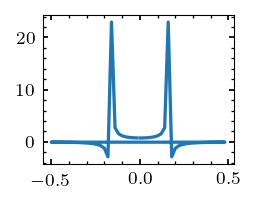

In [9]:
x = np.linspace(0, 50)
y = np.cos(x)
fft = np.fft.fft(y)
freq = np.fft.fftfreq(len(x), d=1)
plt.plot(freq, fft)

When the parameter $d$ of function `numpy.fft.fftfreq(len, d)` is set to 1, the distance between adjacent data point in $x$, the peak wavenumber is the same as expected. Thus, if we put the actual distance in certain unit between two adjacent points as $d$, say 8.33 um in this experiment, the resultant $k$ field will have unit um$^{-1}$.

**2D fftfreq function**

In [11]:
help(compute_wavenumber_field)

Help on function compute_wavenumber_field in module corrLib:

compute_wavenumber_field(shape, d)
    Compute the wave number field Kx and Ky, and magnitude field k. 
    Note that this function works for even higher dimensional shape.
    
    Args:
    shape -- shape of the velocity field and velocity fft field, tuple
    d -- sample spacing. This is the distance between adjacent samples, for example, velocities in PIV. 
        The resulting frequency space has the unit which is inverse of the unit of d. The preferred unit of d is um.
    
    Returns:
    k -- wavenumber magnitude field
    K -- wavenumber fields in given dimensions
    
    Test:
    shape = (5, 5)
    k, K = compute_wavenumber_field(shape, 0.2)



## 2 Compute energy spectrum

**Method I**
$$
E(k_x, k_y) = \langle u_k(k_x, k_y)u^*_k(k_x, k_y)+v_k(k_x, k_y)v_k^*(k_x, k_y)\rangle/2
$$

In [12]:
help(energy_spectrum)

Help on function energy_spectrum in module corrLib:

energy_spectrum(pivData, d=8.25)
    Compute energy spectrum (E vs k) from pivData.
    
    Args:
    pivData -- piv data
    d -- sample spacing. This is the distance between adjacent samples, for example, velocities in PIV. 
        The resulting frequency space has the unit which is inverse of the unit of d. The default unit of d is um.
    
    Returns:
    es -- energy spectrum, DataFrame (k, E)
    
    Edit:
    10192020 -- add argument d as sample spacing



Text(0.02, 585.2825164504771, '-2.5')

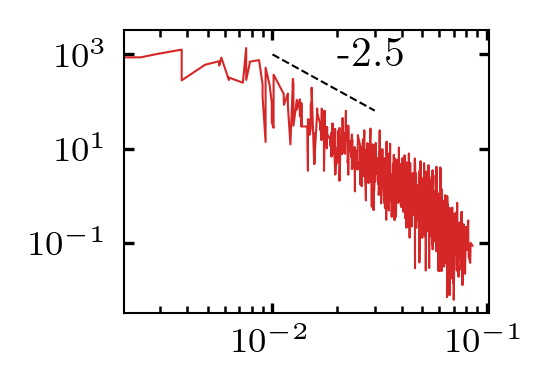

In [25]:
pivData = pd.read_csv(r'D:\density_fluctuations\08032020\piv_imseq\08\3000-3001.csv')
es = energy_spectrum(pivData, d=25*0.33)
plt.figure(dpi=300)
plt.plot(es.k, es.E*0.33*0.33, lw=0.5, color=bestcolor(3))
plt.loglog()

x = np.array([0.01,0.03])
y = x ** -2.5* 1e-2
plt.plot(x, y, lw=0.5, ls='--', color='black')
plt.text(x.mean(), 1.1*y.mean(), '-2.5')

**An alternative way to calculate energy spectrum**

$$
E(k)=\frac{1}{(2\pi)^2}\int  e^{-ikR} \langle v(t, r)\cdot v(t, r+R)\rangle d^2 R
$$

(*Fluid mechanics, turbulent flow and turbulence modeling*, Lars Davidson, pp 443)

In [2]:
X, Y, U, V = read_piv(r'D:\density_fluctuations\08032020\piv_imseq\08\3000-3001.csv')
XS, YS, CA, CV = vspatial(X, Y, U, V)

- visualize piv and two-point velocity correlation

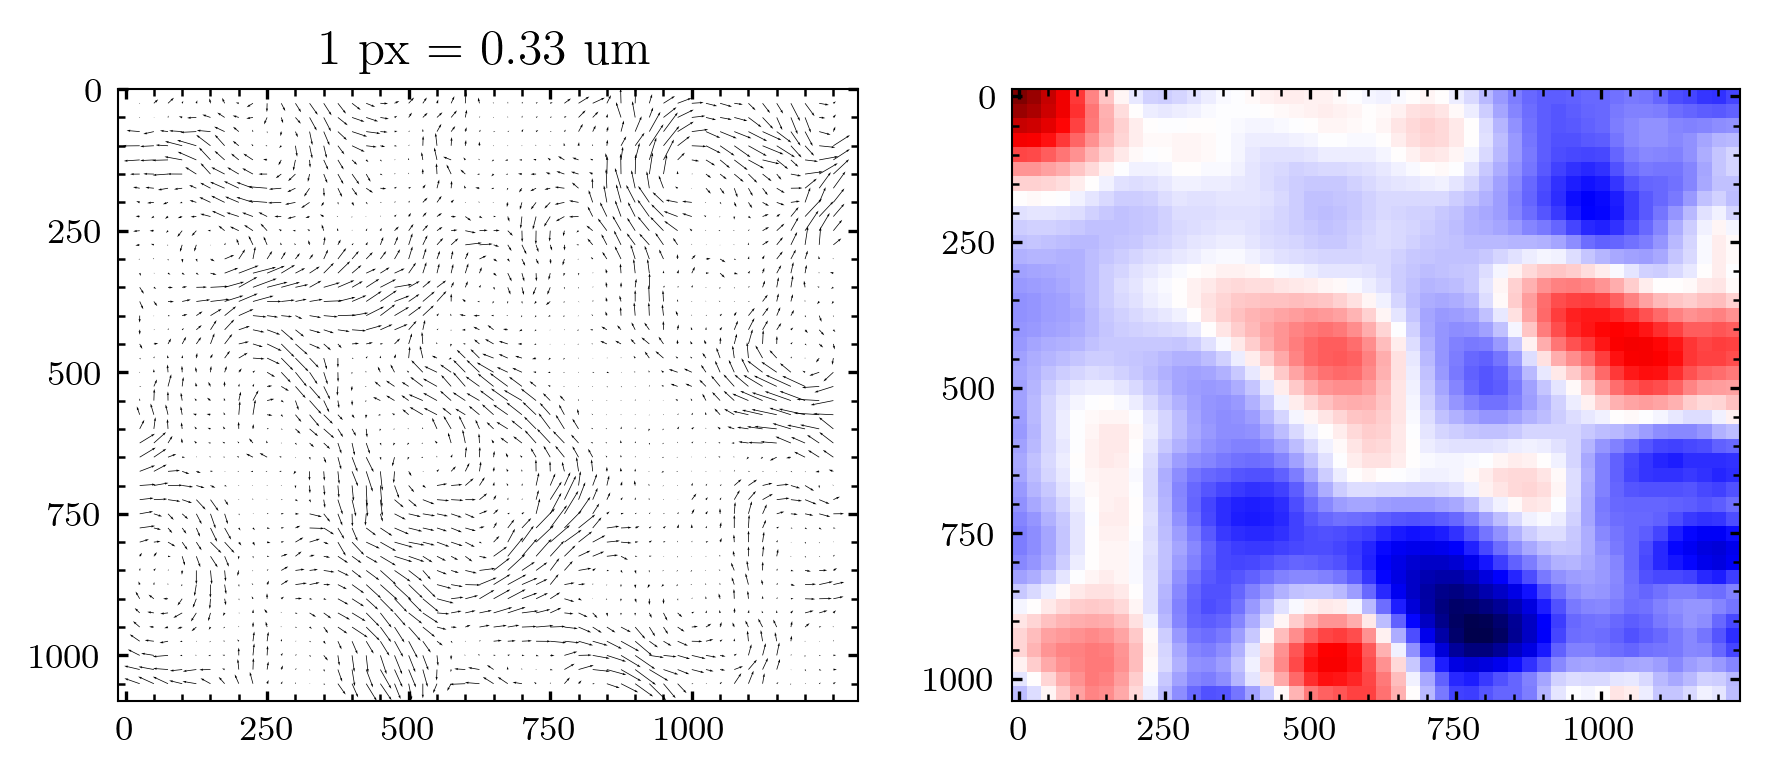

In [3]:
visualize_two_point_correlation(X, Y, U, V, CV)

- Calculate energy spectrum and visualize the decay of energy density with wavenumber $k$

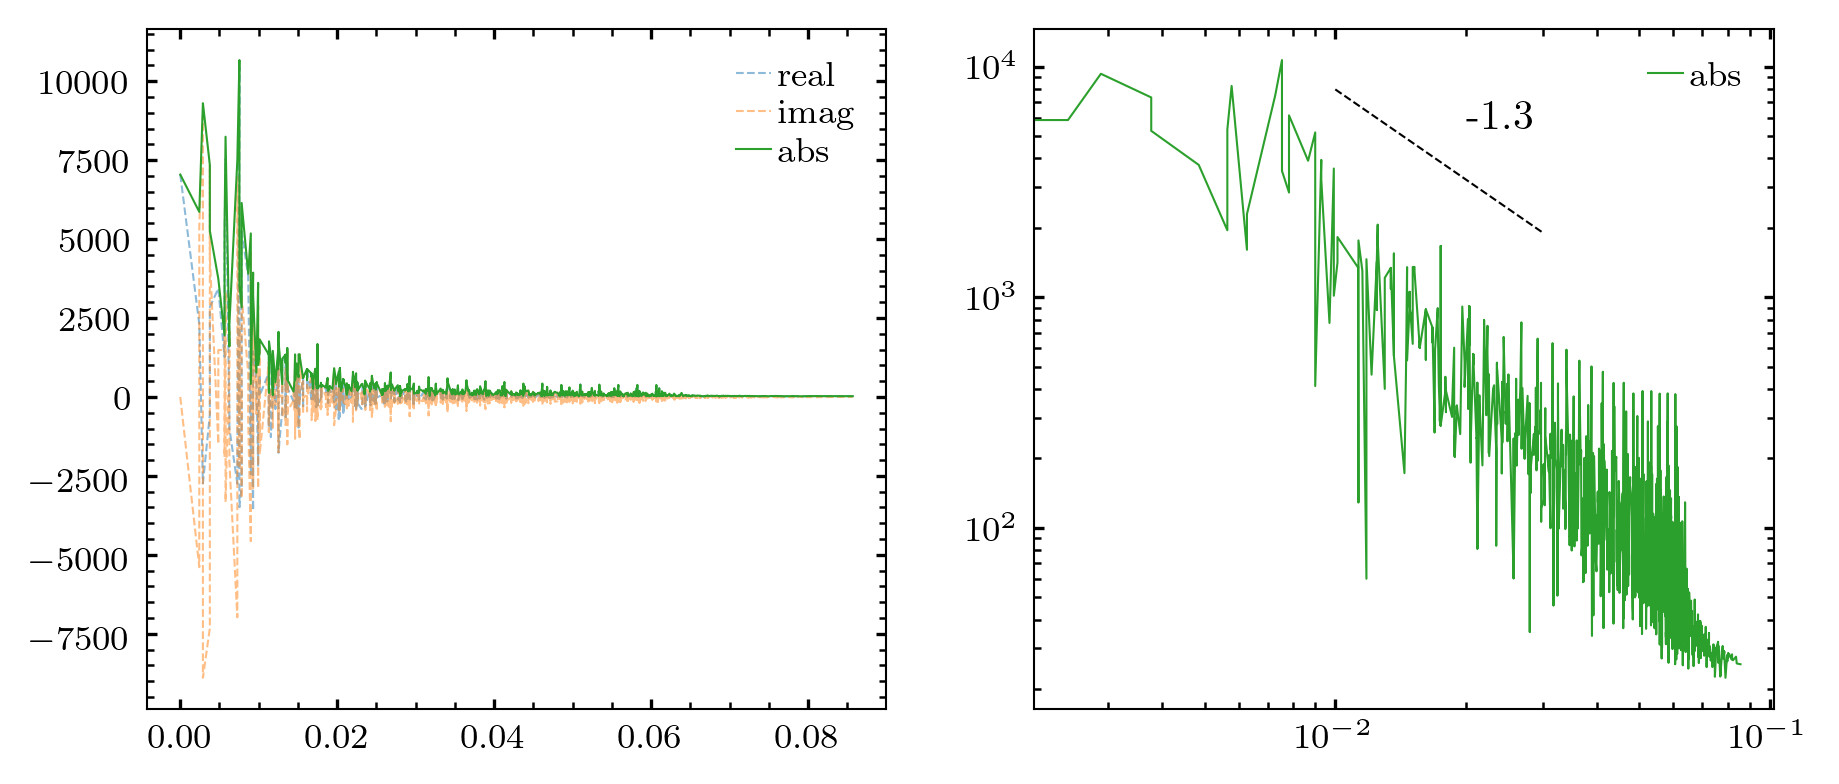

In [4]:
calculate_and_visualize_energy_spectrum(CV)

**Compare the two methods**

Clearly, the two methods presented above give different energy spectrum result. Below I plot them on the same axis and compare the difference.

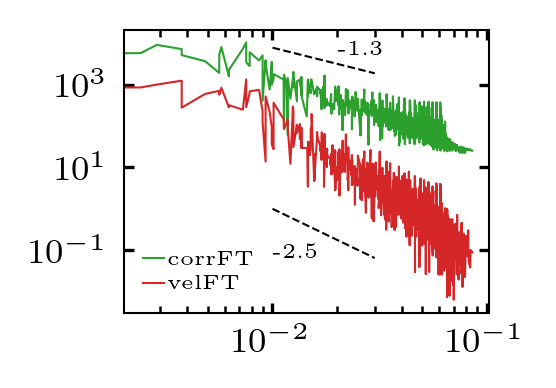

In [39]:
pivDir = r'D:\density_fluctuations\08032020\piv_imseq\08\3000-3001.csv'
plt.figure(dpi=300)

X, Y, U, V = read_piv(pivDir)
XS, YS, CA, CV = vspatial(X, Y, U, V)
k, E = energy_spectrum_2(CV)
plt.plot(k, abs(E), lw=0.5, color=bestcolor(2), label='corrFT')

pivData = pd.read_csv(pivDir)
es = energy_spectrum(pivData, d=25*0.33)
plt.plot(es.k, es.E*0.33*0.33, lw=0.5, color=bestcolor(3), label='velFT')
plt.loglog()

x = np.array([0.01,0.03])
y = x ** -1.3 * 2e1
plt.plot(x, y, lw=0.5, ls='--', color='black')
plt.text(x.mean(), 1.1*y.mean(), '-1.3', {'fontsize':5})
    
x = np.array([0.01,0.03])
y = x ** -2.5* 1e-5
plt.plot(x, y, lw=0.5, ls='--', color='black')
plt.text(x[0], y[1], '-2.5', {'fontsize':5})

plt.legend(fontsize=5)

## 3 Verification

According to Wensink 2012, energy spectrum $E(k)$ is defined as
$$
\langle v^2\rangle = 2\int^\infty_0 E(k)dk
$$

Here, we use this criteria to verify the two methods.

In [40]:
pivDir = r'D:\density_fluctuations\08032020\piv_imseq\08\3000-3001.csv'

**Compute $\langle v^2\rangle$**

In [41]:
X, Y, U, V = read_piv(pivDir)
vms = (U**2 + V**2).mean()
vms

331.8102345968192

**Method I: velFT**

In [51]:
pivData = pd.read_csv(pivDir)
es = energy_spectrum(pivData, d=25*0.33) * 0.33 * 0.33
velFT = trapz(es.E, es.k)
velFT

0.9322715317269599

**Method II: corrFT**

In [46]:
XS, YS, CA, CV = vspatial(X, Y, U, V)
k, E = energy_spectrum_2(CV)
corrFT = trapz(abs(E), k)
corrFT

69.44232455781734

**Result**

Neither of the two methods agree with the definition quatitatively. Among them, method II: corrFT shows a better agreement.

## 7 Summarize data
After the batch process, I have multiple energy spectrum data for each sample. To summarize, I compress the data for each sample into one energy spectrum by averaging over all data for this sample. This average will be saved to a summary .csv file under *energy_spectrum* folder.

In [95]:
folder = r'D:\density_fluctuations\08062020\energy_spectrum'
sfL = next(os.walk(folder))[1]
count = 0
for sf in sfL:
    es_folder = os.path.join(folder, sf)
    l = readdata(es_folder, 'csv')
    for num, i in l.iterrows():
        if num == 0:
            data = pd.read_csv(i.Dir)
        else:
            data += pd.read_csv(i.Dir)
    data /= num + 1
    if count == 0:
        summary = data.assign(sample=sf)
    else:
        summary = summary.append(data.assign(sample=sf))
    count += 1

In [96]:
summary.to_csv(os.path.join(folder, 'summary.csv'), index=False)